# Hands On 3 (Regresión)
## Minería de Datos 2021

### 1.- AIrB&B 

**1.1**- Descargue los 4 csv del aula virtual (mismo lugar donde encontró este archivo). Este dataset corresponde a información sobre arriendos de la aplicación AirB&B en la pintoresca ciudad de Amsterdam, en Holanda. Los archivos estan separados en training y test, pero además se entrega la variable objetivo de la regresión en archivos separado llamados ``y_train.csv`` e ``y_test.csv`` respectivamente,

Las características (features) corresponden a:

| **Feature**   | **Descripción**                                       |
|---------------|-------------------------------------------------------|
| accommodates  | numero de pasajeros que caben en el alojamiento       |
| bathrooms     | cantifad de baños                                     |
| bedrooms      | cantidad de habitaciones |
| calculated_host_listings_count | cantidad de alojamientos disponibles calculado por la plataforma en la misma dirección |
| guests_included | cantidad de pasajeros incluidos en el precio por noche | 
| host_listings_count | cantidad de alojamientos disponibles declarados por el anunciante en la misma dirección |
| latitude | latitud |
| longitude | longitud |
| minimum_nights | cantidad mínima de noches |
| number_of_reviews | cantidad de comentarios realizados en la plataforma |
| d_centre | distancia al centro de la ciudad |
| instant_bookable_t | tiene reserva inmediata |
| instant_bookable_f | tiene reserva solo después de una confirmación |
| room_type_Entire home/apt | es un departamento/casa completa |
| room_type_Private room | es una pieza privada |
| room_type_Shared room | es una pieza compartida |

Además, los archivos ``y_train.csv`` e ``y_test.csv`` contienen el precio de arriendo para los dos conjuntos.

**1.2**- Cargue los 4 archivos en DataFrame pandas y muestre las estadísticas de las columnas tanto de los train como de los tests.

In [1]:
import pandas
train = pandas.read_csv('train.csv')
train.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000,10498.000000
mean,2.893694,1.120213,1.387598,2.891122,1.505239,3.349400,52.365324,4.889084,2.912936,17.707944,3.001106,0.844542,0.155458,0.777005,0.219280,0.003715
std,1.326817,0.360843,0.845380,8.853806,0.955633,11.157171,0.015832,0.035094,7.995548,34.717291,1.620033,0.362358,0.362358,0.416275,0.413778,0.060840
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.355621,4.865018,2.000000,2.000000,1.949055,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.364995,4.886252,2.000000,7.000000,2.836803,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,52.374899,4.908030,3.000000,18.000000,3.577086,1.000000,0.000000,1.000000,0.000000,0.000000
max,17.000000,8.000000,10.000000,91.000000,16.000000,106.000000,52.426224,5.026701,523.000000,496.000000,11.842162,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
test = pandas.read_csv('test.csv')
test.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2.849111,1.106889,1.398667,2.936222,1.485556,3.425778,52.365285,4.888913,2.820000,18.006222,2.992695,0.842889,0.157111,0.777556,0.216889,0.005556
std,1.229459,0.298766,0.826166,8.795454,0.904664,11.312217,0.015609,0.034817,5.114519,34.884376,1.589873,0.363946,0.363946,0.415934,0.412172,0.074337
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,52.290687,4.774976,1.000000,0.000000,0.212781,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.355510,4.864308,2.000000,2.000000,1.948888,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,52.364907,4.886638,2.000000,7.000000,2.853090,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,52.374549,4.907757,3.000000,18.000000,3.576940,1.000000,0.000000,1.000000,0.000000,0.000000
max,16.000000,4.000000,10.000000,91.000000,16.000000,106.000000,52.424980,5.027689,180.000000,408.000000,11.592780,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
y_train = pandas.read_csv('y_train.csv')
y_train.describe()

,price
count,10498.000000
mean,129.733283
std,63.757064
min,19.000000
25%,89.000000
50%,115.000000
75%,150.000000
max,440.000000


In [4]:
y_test = pandas.read_csv('y_test.csv')
y_test.describe()

,price
count,4500.000000
mean,130.789778
std,63.968657
min,23.000000
25%,89.000000
50%,117.000000
75%,150.000000
max,433.000000


**PREGUNTA**: Complete la tabla del punto 1.1. agregando el tipo de dato (i.e., real, entero, binario, categorico, etc.)

**1.3**- Muestre la matriz de correlación (con heatmap) incluyendo el precio de arriendo tanto para el training como para el test.

In [5]:
tdat=train.copy()
tdat['price']=y_train

<AxesSubplot:>

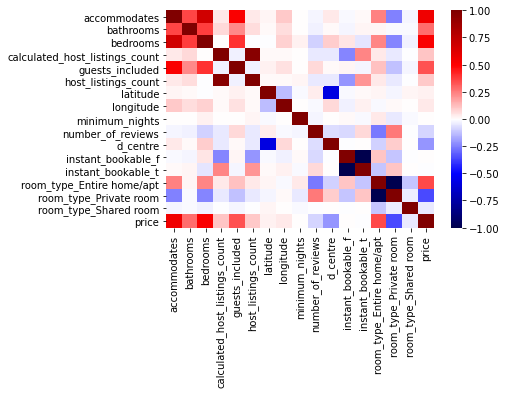

In [6]:
import seaborn as sns
sns.heatmap(tdat.corr(),cmap="seismic")

<AxesSubplot:>

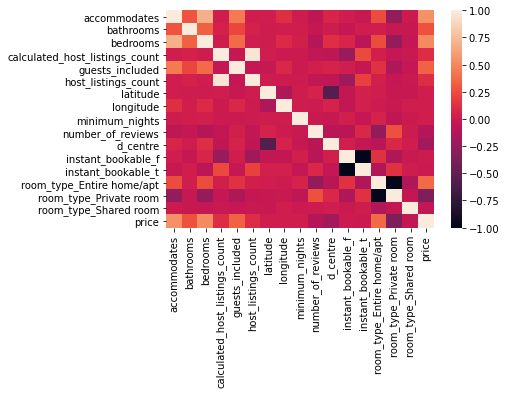

In [7]:
tdat_t=test.copy()
tdat_t['price']=y_test
sns.heatmap(tdat_t.corr())

<AxesSubplot:>

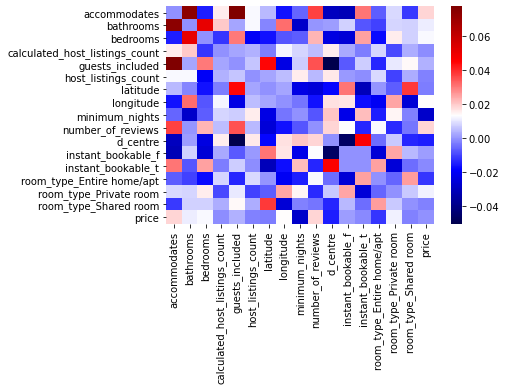

In [8]:
sns.heatmap(tdat.corr() - tdat_t.corr(),cmap="seismic")

**PREGUNTA**: ¿Qué puede decir de los dos conjuntos? ¿Representan un espacio de datos similar?

### 2- Regresión Lineal con Modelo Lineal en 1D

**2.1** Indique las 5 características que tengan la mayor correlación (o anti-correlación, i.e., valores negativos) con respecto al precio de arriendo en el conjunto de entrenamiento. Realice un pairplot con estas variables.

In [9]:
import matplotlib.pyplot as plt
corrbar=abs(tdat.corr()['price'])

In [10]:
corrbar>0.3

accommodates                       True
bathrooms                         False
bedrooms                           True
calculated_host_listings_count    False
guests_included                    True
host_listings_count               False
latitude                          False
longitude                         False
minimum_nights                    False
number_of_reviews                 False
d_centre                          False
instant_bookable_f                False
instant_bookable_t                False
room_type_Entire home/apt          True
room_type_Private room             True
room_type_Shared room             False
price                              True
Name: price, dtype: bool

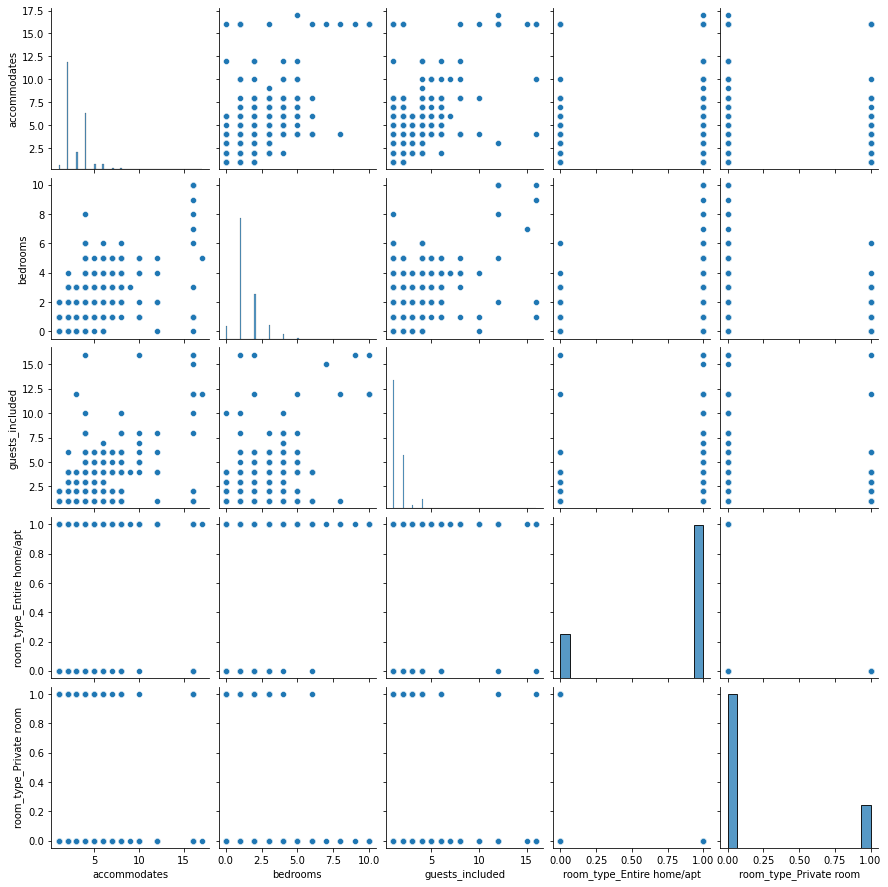

In [11]:
sns.pairplot(tdat,vars = ['accommodates','bedrooms','guests_included','room_type_Entire home/apt','room_type_Private room'])


**PREGUNTA**: ¿Cuál es la dificultad de trabajar con estas características?

**2.2** Haga un diagrama de dispersión con las variables geográficas (latitud y longitud), incluyendo el precio como variable de color (en su colormap preferido) de los datos de entrenamiento. Agregue una imagen de Amsterdam para ver si coincide su topología.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

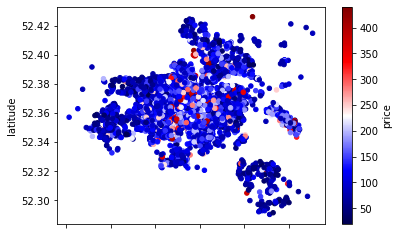

In [12]:
tdat.plot.scatter('longitude','latitude',c='price',cmap='seismic')

**PREGUNTA**: ¿Puede identificar un patrón en los colores de esta imágen?

**2.3** Considerando el punto anterior, ahora tomaremos la variable ``d_centre`` como nuestro X y el ``price``como nuetro Y. Realice una regresión Ridge y una KernelRidge con kernel RBF para los datos de entrenamiento y parámetros por defecto. Realice un diagrama de dispersión de estas dos variables, y grafique ambas curvas de regresión en distintos colores. Calcule además el error cuadrático medio (Mean Squared Error) de entrenamiento y de testing para cada uno de los dos modelos (i.e., Ridge y KernelRidge).

In [13]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
import numpy as np
ridge = Ridge()
kridge = KernelRidge(kernel='rbf')
X = train['d_centre'].to_numpy()
X = X.reshape(len(X),1)
X_t = test['d_centre'].to_numpy()
X_t = X_t.reshape(len(X_t),1)
x_range = np.linspace(X.min(),X.max(),1000).reshape(1000,1)
ridge.fit(X,y_train)
kridge.fit(X,y_train)
y_ridge=ridge.predict(x_range)
y_kridge=kridge.predict(x_range)

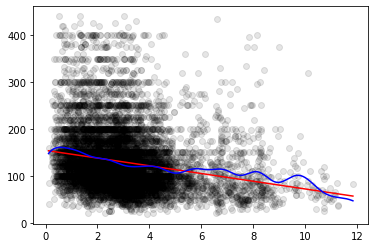

In [14]:
plt.scatter(X,y_train,c='k',alpha=0.1)
plt.plot(x_range,y_ridge,c='r')
plt.plot(x_range,y_kridge,c='b')

In [15]:
from sklearn.metrics import mean_squared_error as mse


print("Train Ridge:"+str(mse(y_train,ridge.predict(X))))
print("Train KRidge:"+str(mse(y_train,kridge.predict(X))))
print("Test Ridge:"+str(mse(y_test,ridge.predict(X_t))))
print("Test KRidge:"+str(mse(y_test,kridge.predict(X_t))))

Train Ridge:3886.9886746085763
Train KRidge:3841.62334194246
Test Ridge:3937.7912680233735
Test KRidge:3892.239392997202


**PREGUNTA**: ¿Cuál es un mejor modelo para estos datos y por qué?

### 3- Regresión en ND
**3.1** Vuelva a utilizar todo el dataset, estandarice el set de entramiento y ocupe la misma transformación para el testing. Deje sus datos estandarizados en dataframes pandas y haga un describe() del conjunto de entrenamiento.
Realice la regresión para el precio de arriendo, y reporte los errores cuadráticos medios al igual que en la pregunta 2.3.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
X_train = train.values
X_test = test.values
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(X_train)
data_train = pandas.DataFrame(std_scaler.transform(X_train),columns=train.columns)
data_test = pandas.DataFrame(std_scaler.transform(X_test),columns=test.columns)
data_train.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
count,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04,1.049800e+04
mean,-9.475708e-18,7.597487e-17,5.651583e-17,-2.030509e-18,-1.475503e-16,2.030509e-18,-6.694994e-14,-2.384156e-14,1.421356e-17,-8.460454e-18,6.768363e-19,-1.556723e-17,-3.113447e-17,-6.903730e-17,-8.798872e-17,2.707345e-17
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.427314e+00,-3.104581e+00,-1.641467e+00,-2.136044e-01,-5.287212e-01,-3.002158e-01,-4.738411e+00,-3.863278e+00,-2.392615e-01,-5.100855e-01,-1.781100e+00,-2.330793e+00,-4.290384e-01,-1.866657e+00,-5.299705e-01,-6.106428e-02
25%,-6.735947e-01,-3.331617e-01,-4.585110e-01,-2.136044e-01,-5.287212e-01,-2.105831e-01,-6.128781e-01,-6.858064e-01,-1.141860e-01,-4.524746e-01,-6.494318e-01,4.290384e-01,-4.290384e-01,5.357171e-01,-5.299705e-01,-6.106428e-02
50%,-6.735947e-01,-3.331617e-01,-4.585110e-01,-2.136044e-01,-5.287212e-01,-2.105831e-01,-2.076772e-02,-8.072677e-02,-1.141860e-01,-3.084473e-01,-1.014239e-01,4.290384e-01,-4.290384e-01,5.357171e-01,-5.299705e-01,-6.106428e-02
75%,8.338445e-01,-3.331617e-01,7.244452e-01,-2.136044e-01,5.177560e-01,-2.105831e-01,6.048425e-01,5.398723e-01,1.088960e-02,8.412797e-03,3.555532e-01,4.290384e-01,-4.290384e-01,5.357171e-01,-5.299705e-01,-6.106428e-02
max,1.063220e+01,1.906678e+01,1.018809e+01,9.952000e+00,1.516844e+01,9.200853e+00,3.846765e+00,3.921552e+00,6.505018e+01,1.377742e+01,5.457590e+00,4.290384e-01,2.330793e+00,5.357171e-01,1.886898e+00,1.637619e+01


In [17]:
ridge = Ridge()
kridge = KernelRidge(kernel='rbf')
ridge.fit(data_train,y_train)
kridge.fit(data_train,y_train)
print("Train Ridge:"+str(mse(y_train,ridge.predict(data_train))))
print("Train KRidge:"+str(mse(y_train,kridge.predict(data_train))))
print("Test Ridge:"+str(mse(y_test,ridge.predict(data_test))))
print("Test KRidge:"+str(mse(y_test,kridge.predict(data_test))))

Train Ridge:2115.484817279046
Train KRidge:1632.012008546672
Test Ridge:2188.330377327452
Test KRidge:1954.7085633868971


**PREGUNTA**: ¿Qué conclusiones puede usted sacar en comparación con la pregunta 2.3?

**3.2** Realice un PCA a los datos de entrenamiento con una cantidad de componentes que expliquen al menos el 80% de la varianza (muestre el gráfico de varianza explicada). Aplique la misma transformación a los datos de testing. Ejecute otra vez las regresiones Ridge y KernelRidge y calcule nuevamente los errores cuadráticos medios. 

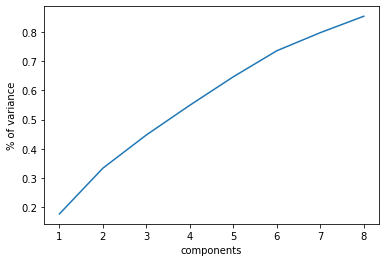

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

def do_PCA(n, train,test):
    pca = decomposition.PCA(n_components=n)
    pca.fit(test)
    train_pca = pca.transform(train)
    test_pca = pca.transform(test)
    varx = pca.explained_variance_ratio_
    plt.plot(np.arange(1,n+1),varx.cumsum())
    plt.ylabel("% of variance")
    plt.xlabel("components")

    train_pca = pandas.DataFrame(train_pca)
    test_pca = pandas.DataFrame(test_pca)
    plt.show()
    return train_pca, test_pca

train_pca,test_pca = do_PCA(8, data_train,data_test)

In [19]:
ridge = Ridge()
kridge = KernelRidge(kernel='rbf')
ridge.fit(train_pca,y_train)
kridge.fit(train_pca,y_train)
print("Train Ridge:"+str(mse(y_train,ridge.predict(train_pca))))
print("Train KRidge:"+str(mse(y_train,kridge.predict(train_pca))))
print("Test Ridge:"+str(mse(y_test,ridge.predict(test_pca))))
print("Test KRidge:"+str(mse(y_test,kridge.predict(test_pca))))

Train Ridge:2402.6175495459775
Train KRidge:1808.9653353886602
Test Ridge:2437.3532370279186
Test KRidge:2038.37946804342


**Pregunta**: ¿Fué exitosa la aplicación de PCA? Fundamente su respuesta razonando sobre la función de PCA, y no solo comentando los resultados.

**3.3** Como usted conoce ya la API de scikit-learn, y esta es la misma para todos los regresores (i.e., de hecho lo es para todos los estimadores) realice una regresión con otra técnica (que no sea Lasso y Regresión Lineal Simple) y reporte sus errores cuadráticos medios de training y testing

In [20]:
from sklearn import tree

dt = tree.DecisionTreeRegressor()
dt.fit(train_pca,y_train)
print("Train DT:"+str(mse(y_train,dt.predict(train_pca))))
print("Test DT:"+str(mse(y_test,dt.predict(test_pca))))


Train DT:0.0
Test DT:3807.4211111111113


In [21]:
# ponga aquí su código

**PREGUNTA FINAL**: Compare el resultado de la técnica que usted eligió con Kernel Ridge. 